In [1]:
import pandas as pd
import numpy as np

In [2]:
excel_path = "/content/2526MBD41_Project_Dataset.xlsx"

disclaimer
Some parts of this project (data cleaning mainly), were made with the assistance of AI (ChatGPT).
Ai was used for, clarification, debugging and improvment of some result interpretation.
However, all coding, data analysis and final conclusions were made by the student only.  

# **Data set Cleaning**

In [3]:
df_company = pd.read_excel(excel_path, sheet_name="COMPANY")
df_investment = pd.read_excel(excel_path, sheet_name="INVESTMENT")
df_acquisition = pd.read_excel(excel_path, sheet_name="ACQUISITION")
df_employee = pd.read_excel(excel_path, sheet_name="EMPLOYEE")

In [4]:
df_company.head(15)

,COMPANY_NAME,CATEGORY,LOCATION,FOUNDED_ON,EXITED_ON,CLOSED_ON,REVENU_RANGE,EMPLOYEE_NUMBER,Unnamed: 8,Unnamed: 9
0,Orange,—,"Paris, Ile-de-France, France","Jan 1, 1991","Apr 1, 1999",—,$10B+,10001+,NaN,NaN
1,OpenLattice,—,"Redwood City, California, United States",2017,—,—,Less than $1M,11-50,NaN,NaN
2,NYDIG,—,"New York, New York, United States",2017,—,—,—,—,NaN,NaN
3,AngelList,—,"San Francisco, California, United States","Jan 1, 2010",—,—,$1M to $10M,1-10,NaN,NaN
4,Desktop Metal,"3D Printing, 3D Technology, Precious Metals, R...","Burlington, Massachusetts, United States",2015,—,—,$1M to $10M,101-250,Row Labels,Count of FOUNDED_ON
5,Relativity Space,"3D Technology, Aerospace, Artificial Intellige...","Long Beach, California, United States",2016,—,—,$1M to $10M,251-500,1836,1
6,Archistar.ai,"3D Technology, Architecture, Artificial Intell...","Sydney, New South Wales, Australia",Apr 2010,—,—,$1M to $10M,51-100,1841,1
7,Loom.ai,"3D Technology, Artificial Intelligence, Augmen...","San Francisco, California, United States",2016,"Dec 14, 2020",—,$1M to $10M,11-50,1847,1
8,360VUZ,"3D Technology, Augmented Reality, Media and En...","Los Angeles, California, United States","Jan 1, 2017",—,—,$10M to $50M,11-50,1849,1
9,Parallel Domain,"3D Technology, Autonomous Vehicles, Big Data, ...","Palo Alto, California, United States",Aug 2017,—,—,$1M to $10M,11-50,1851,1


In [79]:
df_company.info()
df_investment.info()
df_acquisition.info()
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   COMPANY_NAME           1000 non-null   string        
 1   CATEGORY               996 non-null    string        
 2   LOCATION               1000 non-null   string        
 3   FOUNDED_ON             347 non-null    datetime64[ns]
 4   EXITED_ON              321 non-null    datetime64[ns]
 5   CLOSED_ON              3 non-null      datetime64[ns]
 6   REVENU_RANGE           954 non-null    string        
 7   EMPLOYEE_NUMBER        998 non-null    string        
 8   Unnamed: 8             430 non-null    string        
 9   Unnamed: 9             430 non-null    string        
 10  EMPLOYEE_NUMBER_CLEAN  998 non-null    float64       
dtypes: datetime64[ns](3), float64(1), string(7)
memory usage: 86.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5937 e

In [6]:
to_replace = ["—", "...", " ", "", "-", "NA","N/A", "na", "NaT"]

In [7]:
df_company = df_company.replace(to_replace, pd.NA)
df_investment = df_investment.replace(to_replace, pd.NA)
df_acquisition = df_acquisition.replace(to_replace, pd.NA)
df_employee = df_employee.replace(to_replace,pd.NA)

In [8]:
for df in [df_company, df_investment, df_acquisition, df_employee]:
  obj_cols= df.select_dtypes(include="object").columns
  for col in obj_cols:
    df[col]= df[col].astype("string").str.strip()

In [9]:
df_company["FOUNDED_ON"]= pd.to_datetime(df_company["FOUNDED_ON"], errors="coerce")
df_company["EXITED_ON"]= pd.to_datetime(df_company["EXITED_ON"], errors="coerce")
df_company["CLOSED_ON"]= pd.to_datetime(df_company["CLOSED_ON"], errors="coerce")

df_investment["ANNOUNCED_DATE"]= pd.to_datetime(df_investment["ANNOUNCED_DATE"], errors="coerce")
df_acquisition["ANNOUNCED_DATE"]= pd.to_datetime(df_acquisition["ANNOUNCED_DATE"], errors="coerce")




In [10]:
df_investment["MONEY_RAISED_CLEAN"] = (
    df_investment["MONEY_RAISED"]
    .astype("string")
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
)

df_investment["MONEY_RAISED_CLEAN"]= pd.to_numeric(
    df_investment["MONEY_RAISED_CLEAN"], errors="coerce"
)

In [11]:
df_acquisition["PRICE_CLEAN"] = (
    df_acquisition["PRICE"]
    .astype("string")
    .str.replace("$","",regex=False)
    .str.replace(",","", regex=False)
)

df_acquisition["PRICE_CLEAN"] =pd.to_numeric(
    df_acquisition["PRICE_CLEAN"], errors="coerce"
)

In [12]:
df_company["EMPLOYEE_NUMBER_CLEAN"] = (
    df_company["EMPLOYEE_NUMBER"]
    .astype("string")
    .str.replace(",","", regex=False)
    .str.replace("+", "", regex=False)
    .str.split("-")
    .str[0]
)

df_company["EMPLOYEE_NUMBER_CLEAN"] = pd.to_numeric(
    df_company["EMPLOYEE_NUMBER_CLEAN"], errors="coerce"
)

In [13]:
investment_agg = df_investment.groupby("COMPANY_NAME").agg(
    investment_count =("MONEY_RAISED_CLEAN", "count"),
    investment_total = ("MONEY_RAISED_CLEAN", "sum"),
    investment_average = ("MONEY_RAISED_CLEAN", "mean"),
).reset_index()


acquisition_agg= df_acquisition.groupby("COMPANY_NAME").agg(
    acquisition_count = ("ACQUIREE_NAME", "count"),
    acquisition_total = ("PRICE_CLEAN", "sum"),
    acquisition_average = ("PRICE_CLEAN", "mean")
).reset_index()

df_company_full= (
    df_company
    .merge(investment_agg, on="COMPANY_NAME", how="left")
    .merge(acquisition_agg, on="COMPANY_NAME", how="left")
)

We cleaned missing values, standardized text fields, converted dates and numeroc amounts, and built an enriched company-level dataset combining investment and acuisition information

In [80]:
df_company_full.info()
df_company_full.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   COMPANY_NAME           1000 non-null   string        
 1   CATEGORY               996 non-null    string        
 2   LOCATION               1000 non-null   string        
 3   FOUNDED_ON             347 non-null    datetime64[ns]
 4   EXITED_ON              321 non-null    datetime64[ns]
 5   CLOSED_ON              3 non-null      datetime64[ns]
 6   REVENU_RANGE           954 non-null    string        
 7   EMPLOYEE_NUMBER        998 non-null    string        
 8   Unnamed: 8             430 non-null    string        
 9   Unnamed: 9             430 non-null    string        
 10  EMPLOYEE_NUMBER_CLEAN  998 non-null    float64       
 11  investment_count       935 non-null    Int64         
 12  investment_total       935 non-null    Int64         
 13  inve

,0
COMPANY_NAME,0
CATEGORY,4
LOCATION,0
FOUNDED_ON,653
EXITED_ON,679
CLOSED_ON,997
REVENU_RANGE,46
EMPLOYEE_NUMBER,2
Unnamed: 8,570
Unnamed: 9,570


# **Questions Part**

<Axes: xlabel='CATEGORY'>

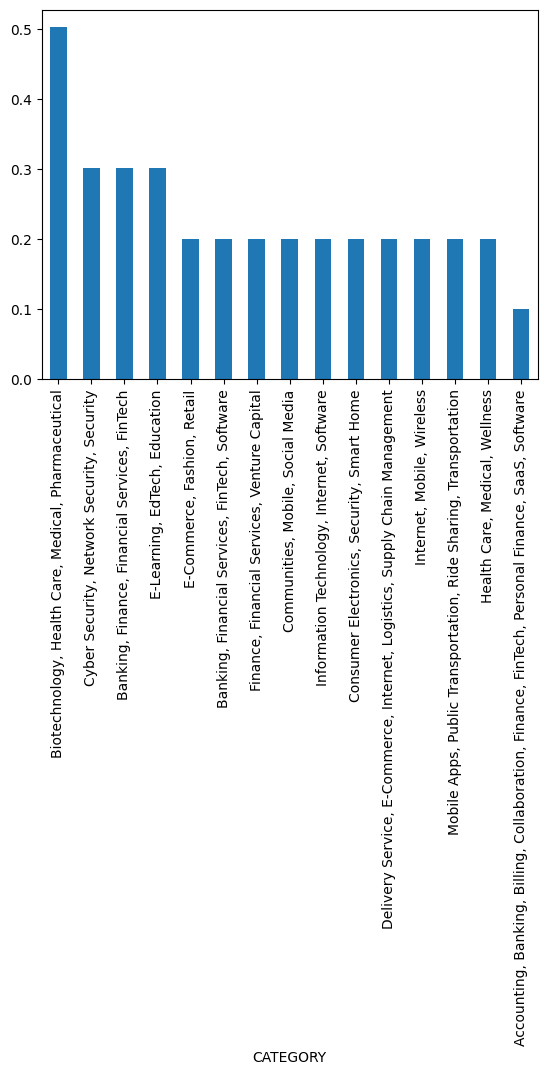

In [100]:
# 1. What are the most common industry categories among the listed companies? And how concentrated is the market?

q1 = df_company["CATEGORY"].value_counts()
((q1 / q1.sum() * 100).head(15)).plot.bar()


 industry categories dominate the market :
Pharmaceutical with 50%, cyber security woth 30% and Banking woth 30% as well.
So we can say the market is heavilly concentrated as few sectors represent the vast majority of the market.

<Axes: xlabel='LOCATION'>

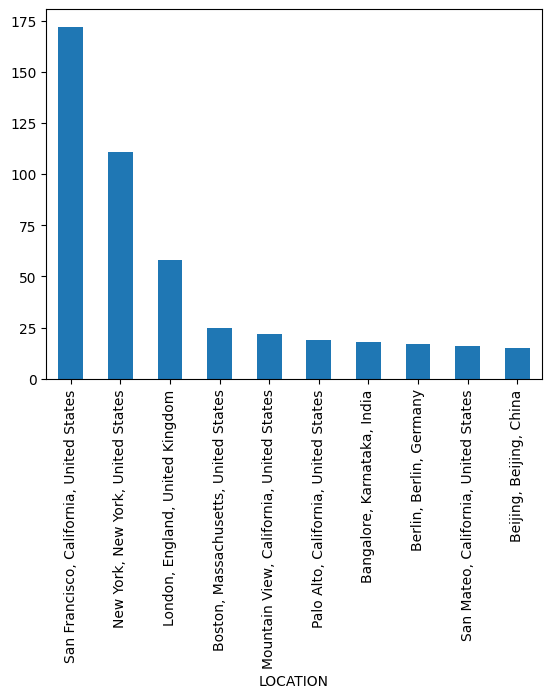

In [15]:
# 2. Which company locations appear to host the highest number of active firms? What can we deduce from this about regional business ecosystems?
df_company_active = df_company[df_company["CLOSED_ON"].isna()]
location_counts= df_company_active["LOCATION"].value_counts()
location_counts.head(10).plot.bar()

np.float64(34.20260782347041)

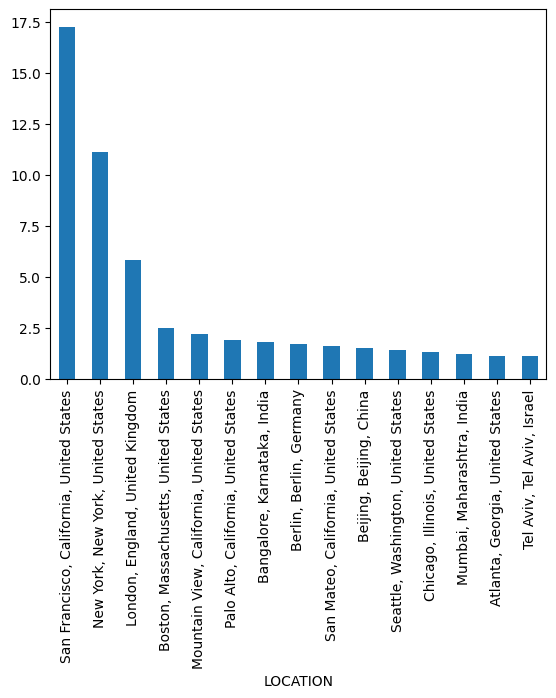

In [16]:
city_counts = df_company_active["LOCATION"].value_counts()
city_part = (city_counts/ city_counts.sum())*100
city_part.head(15).plot.bar()
city_part.head(3).sum()
#The activity is heavily concentrated in a 3 major cities that are San Francisco, New York and London, with more than 34% of the company here.
#Furthermore, only two companies are not based in an english speaking country in the top 15, which makes us believe that being in an english speaking country is important.

<Axes: xlabel='REVENU_RANGE'>

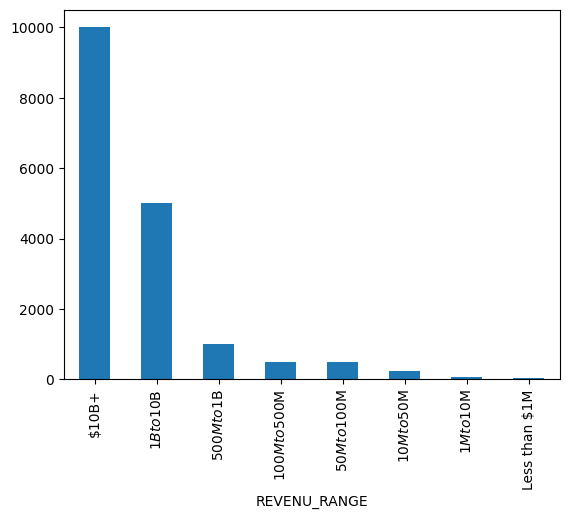

In [101]:
# 3. How does the number of employees vary across different revenue ranges? Do larger teams also mean larger revenues?
df_company.groupby("REVENU_RANGE")["EMPLOYEE_NUMBER_CLEAN"].median().dropna().sort_values(ascending=False).plot.bar()

#Here we can clearly notice a positive relationship with the number of employees of a company and its size, and the turnover of the company.
#The median number increses, th emore money a company got.
#Companies with higher revenues hire more employees because they have more financial resources.

In [18]:
# 4. Among all companies, how many have exited or closed? What is the percentage of them that is still active?
df_company_full["STATUS"] = df_company_full.apply(
    lambda r: "Exited" if pd.notna(r["EXITED_ON"])else (
        "Closed" if pd.notna(r["CLOSED_ON"]) else "Active"
    ),
    axis=1
)



In [102]:
number_exited = (df_company_full["STATUS"] == "Exited").sum()
number_closed = (df_company_full["STATUS"] == "Closed").sum()
number_active = (df_company_full["STATUS"] == "Active").sum()
number_total = df_company_full.shape[0]

number_exited, number_closed, number_active, number_total, round(number_active/number_total*100, 2)

#Amoung the 1000 company 321 exited, only 2 closed and 677 are still active.
# Still the majority of the company of the dataset are still active as 67,7% of them are still active
# The results seems normal are the companies in the dataset are recent and in tech, so a really recent sector, so the distribution is consistent with stratup lifecycle dynamics.

(np.int64(321), np.int64(2), np.int64(677), 1000, np.float64(67.7))

pre question 5 cleaning

In [20]:
df_investment["CURRENCY"] = (
    df_investment["MONEY_RAISED"]
    .astype("string")
    .str.extract(r"^([A-Za-z]+)")
)

In [21]:
df_investment["AMOUNT_RAW"] = (
    df_investment["MONEY_RAISED"]
    .astype("string")
    .str.replace(r"[^0-9]","",regex=True)
)

df_investment["AMOUNT_RAW"] = pd.to_numeric(
    df_investment["AMOUNT_RAW"], errors="coerce"
)

In [22]:
currency_rates = {
    "USD" : 1,
    "ZAR" : 0.055,
    "SGD" : 0.74,
    "CHF" : 1.12,
    "MYR" : 0.21,
    "SEK" : 0.096,
    "RUB" : 0.013,
    "CAD" : 0.75,
    "CNY" : 0.14,
    "CA" : 0.75,
    "CN" : 0.14,
    "R" : 0.013,
    "A" : 1

}

In [23]:
df_investment["CURRENCY"] = df_investment["CURRENCY"].replace({
    "CA" : "CAD",
    "CN" : "CNY",
    "R" : "RUB",
    "A" : "USD"
})

In [24]:
df_investment["CURRENCY"] = df_investment["CURRENCY"].fillna("USD")

In [25]:
df_investment["RATE"] = df_investment["CURRENCY"].map(currency_rates)

In [26]:
df_investment["MONEY_RAISED_USD"] = df_investment["AMOUNT_RAW"] * df_investment["RATE"]

In [27]:
#5. What is the most frequent funding type used by the companies? How does the average amount raised differ depending on the funding type?
df_investment["FUNDING_TYPE"].value_counts()

,count
FUNDING_TYPE,
Series A,854
Seed,762
Series B,701
Series C,582
Venture - Series Unknown,558
Series D,375
Series E,264
Debt Financing,242
Post-IPO Equity,219


<Axes: xlabel='FUNDING_TYPE'>

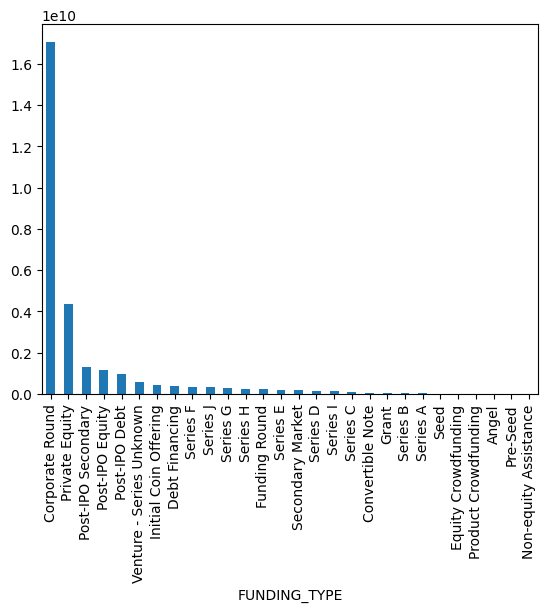

In [104]:
df_investment.groupby("FUNDING_TYPE")["MONEY_RAISED_USD"].mean().sort_values(ascending=False).plot.bar()

#The most common funding type in the dataset is Series A, indicating that this is the easiest way to get financed.
#HThe funding type associated with the highest average amount raised is Corporate Round, which suggest that big companies uses it for strategical financing.
# This also shows that frequency does not necessatily correlate with financial magnitute, since Seria A barely appears on the graph, showing that the average amount raised is very low.

In [29]:
# 6. What is the total and average amount of money raised across different investment stages?
df_investment.groupby("INVESTMENT_STAGE")["MONEY_RAISED_USD"].agg(["sum","mean","count"]).sort_values("sum",ascending=False)

,sum,mean,count
INVESTMENT_STAGE,,,
Private Equity,605734262246.0,4357800447.812949,139
Late Stage Venture,246322512493.0,174325911.176929,1413
Early Stage Venture,53940886326.0,37615680.841004,1434
Seed,4134701143.0,6107387.212703,677


Private equity have a really huge amount per investment with a really limited number of tptal investment (139), which confirm that private equity is for companys that are well established already.
Whereas Late stage venture have a bit more than a third of the total raised by private equity but for a total of investment that are 10 times bigger. So they are for an intermediary stage of development with reasonably high amount.
For Early stage Venture, it's the most frequent type of investment, but with a more modest amount raised, so they are made for companies in early stage of development.
To conclude, Seed have modest amount, and are dedicated to companies to start their launch probably.


In [30]:
# 7. How has the volume of investments evolved over time? Can we notice periods of higher funding activity?
df_investment["ANNOUNCED_YEAR"] = df_investment["ANNOUNCED_DATE"].dt.year
df_investment.groupby("ANNOUNCED_YEAR")["MONEY_RAISED_USD"].sum().sort_index()

,MONEY_RAISED_USD
ANNOUNCED_YEAR,
1968,2510000.0
1977,80000.0
1978,150000.0
1982,0.0
1983,0.0
1987,7500000.0
1996,200000.0
1997,256578.0
1998,28260142.0


<Axes: xlabel='ANNOUNCED_YEAR'>

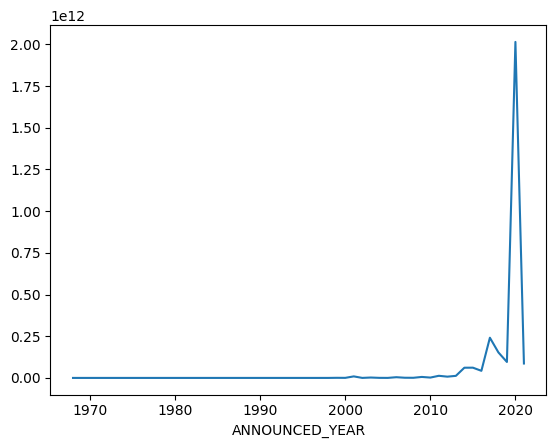

In [31]:
df_investment.groupby("ANNOUNCED_YEAR")["MONEY_RAISED_USD"].sum().sort_index().plot.line()

Before 2000 there was really low amount invested or no investment at all exept in 1998 with a 28M raised.
Then from 2000 until 2013, the amounts are progressively raising with amount up to 12B$.
Then until 2020, the amount are raising exponentially, with a pic in 2017 with more than 200B investment.
Then in 2020, an historical year appear with 2 OOOB invested, witch make this year a huge outlier in the dataset, maybe explained by the COVID-19?
Then the amount slump, but keep at a normal level in 2021 with almost 90B invested.

In [32]:
#8. Which companies has raised the must fundings overall? Can we notice a pattern with specific industries or stages of investment?
investment_agg.sort_values("investment_total", ascending= False).head(15)

,COMPANY_NAME,investment_count,investment_total,investment_average
793,Tesla,33,21981367659,666102050.272727
280,Facebook,15,19509617488,1300641165.866667
41,Ant Group,2,18500000000,9250000000.0
492,Meituan,5,17288000000,3457600000.0
821,Uber,20,17213700000,860685000.0
237,Didi,15,15650800000,1043386666.666667
73,BP,1,12000000000,12000000000.0
685,Sberbank,2,11600000000,5800000000.0
897,Xiaomi,14,8544600000,610328571.428571
158,Charter Communications,4,8125026862,2031256715.5


<Axes: >

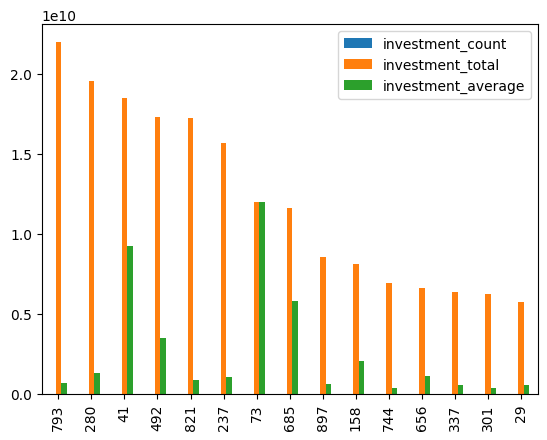

In [33]:
investment_agg.sort_values("investment_total", ascending= False).head(15).plot.bar()

We can notice that the most important fundraising are heavily concentrated with few giants of the tech industry like Tesla or Facebook. Tech industry is needing huge amount of investments to develop and also really frequent invesmtent to keep growing.
We can also notice a second pattern, wih company like BP or Sherbank, that raise really huge amount in few fundraisings, showing a huge strategic vision behind those investment.

In [34]:
#9. Which companies have made the most acquisitions? What can that make us deduce of their investment strategy?
acquisition_agg.sort_values("acquisition_count", ascending=False).head(15)

,COMPANY_NAME,acquisition_count,acquisition_total,acquisition_average
263,Microsoft,235,77567000000,2350515151.515152
86,Cisco,233,77345499998,564565693.416058
187,Google,230,26663300000,634840476.190476
4,Accenture,215,695000000,173750000.0
140,EQT,175,40745000000,2396764705.882353
205,IBM,172,51706000000,2462190476.190476
306,Oracle,123,42031000000,1910500000.0
28,Apple,113,5996000000,315578947.368421
222,Intel,97,63571000000,1816314285.714286
154,Facebook,88,24298970000,1278893157.894737


<Axes: >

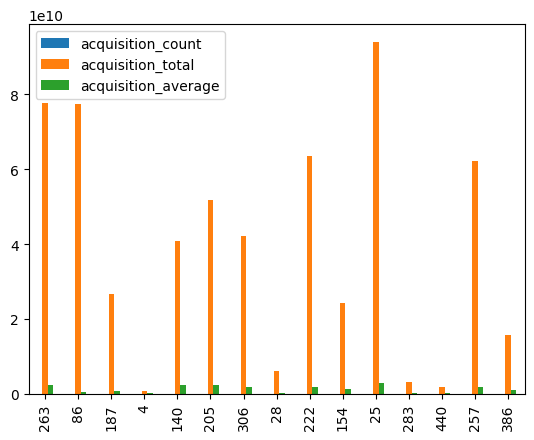

In [35]:
acquisition_agg.sort_values("acquisition_count", ascending=False).head(15).plot.bar()

We can notice that technological firm like Microsoft, Google,Cisco are really active with more than hundred operations shiwing that acquisition and diversification is a really important development lever to use for them.

In [36]:
# 10. How do acquisition prices vary across different acquisition types? Are there any outlier? What can it mean?
df_acquisition.groupby("ACQUISITION_TYPE")["PRICE_CLEAN"].agg(["mean","median","max","count"]).sort_values("mean",ascending=False)

,mean,median,max,count
ACQUISITION_TYPE,,,,
Leveraged Buyout,2915236000.0,2325000000.0,11000000000,25
Acquisition,1505581889.870207,200000000.0,90000000000,1017
Merger,543764000.0,437500000.0,1300000000,4
Acquihire,47857142.857143,7000000.0,182000000,7
Management Buyout,<NA>,<NA>,<NA>,0


classical acquisition represent the vast majority of the operation with more than 1000 operations, and also the highest amount raised.
Leverages buyouts show a really important investment that happens less frequently, but probably for strategical purposes.
Same for merger.
It can mean that acquisition is a more common operation to help the firms growth, but that are not that strategically important.
Whereas Leveraged Buyout and Merger and operation that seldom happens, but are really strategic and often need a huge investment, and are used as a leverage to achieve huge growth.  


In [37]:
#11. At what time is there a peak of the acquisitions? Can it be linked with specific investment trends?
df_acquisition["ACQ_YEAR"] = df_acquisition["ANNOUNCED_DATE"].dt.year
df_acquisition.groupby("ACQ_YEAR")["ACQUIREE_NAME"].count()

,ACQUIREE_NAME
ACQ_YEAR,
1923.0,1
1930.0,2
1932.0,1
1955.0,2
1972.0,1
1978.0,1
1979.0,1
1982.0,2
1984.0,2


<Axes: xlabel='ACQ_YEAR'>

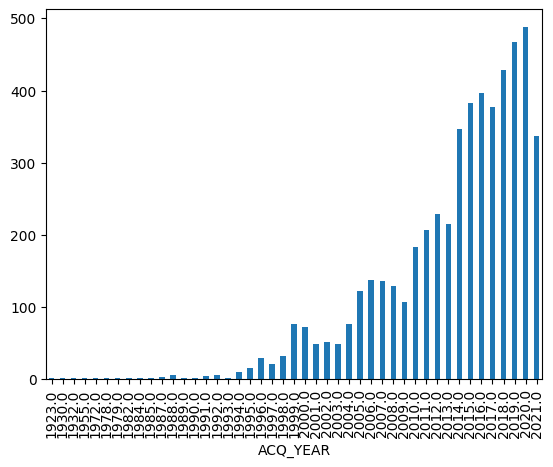

In [38]:
df_acquisition.groupby("ACQ_YEAR")["ACQUIREE_NAME"].count().plot.bar()

Acquisitions stay rare until the 2000, and then grow exponetially until the 2000, but the boom appread in 2014.
Then a peak happens between 2018-2020, highlighting a huge acquisiton activity.
We can like this with two trends, the first the raise of huge concentrated multinationals like Google that purchase evrtything theiy need.
And the second trend is the tech industry, that is very dynamic and need a lot of investment to maintain their growth.

In [39]:
#12. Are certain industries more active in acquiring other firms? What are the most actives firms in acquisition?
df_acquisition_category = df_acquisition.merge(df_company[["COMPANY_NAME", "CATEGORY"]], on= "COMPANY_NAME", how="left")
df_acquisition_category["CATEGORY"].value_counts().head(20)

,count
CATEGORY,
"Cloud Computing, Collaboration, Consumer Electronics, Developer Tools, Enterprise Software, Operating Systems, Software",235
"Communications Infrastructure, Enterprise Software, Hardware",233
"Ad Network, Blogging Platforms, Collaboration, Email, Enterprise Software, Information Technology, Search Engine, Software, Video Streaming",230
"Construction, Consulting, Information Technology, Outsourcing",215
"Business Development, Finance, Financial Services, Internet, Venture Capital",175
"Business Development, Business Information Systems, Collaboration, Computer, CRM, Developer Platform, Enterprise Software, Hardware, Quantum Computing, Software",172
"Collaboration, Computer, Enterprise Software, Information Services, Information Technology, SaaS, Software",123
"Consumer Electronics, Electronics, Hardware, Mobile Devices, Retail, Software",113
"Biotechnology, Health Care, Medical, Pharmaceutical",103


<Axes: xlabel='CATEGORY'>

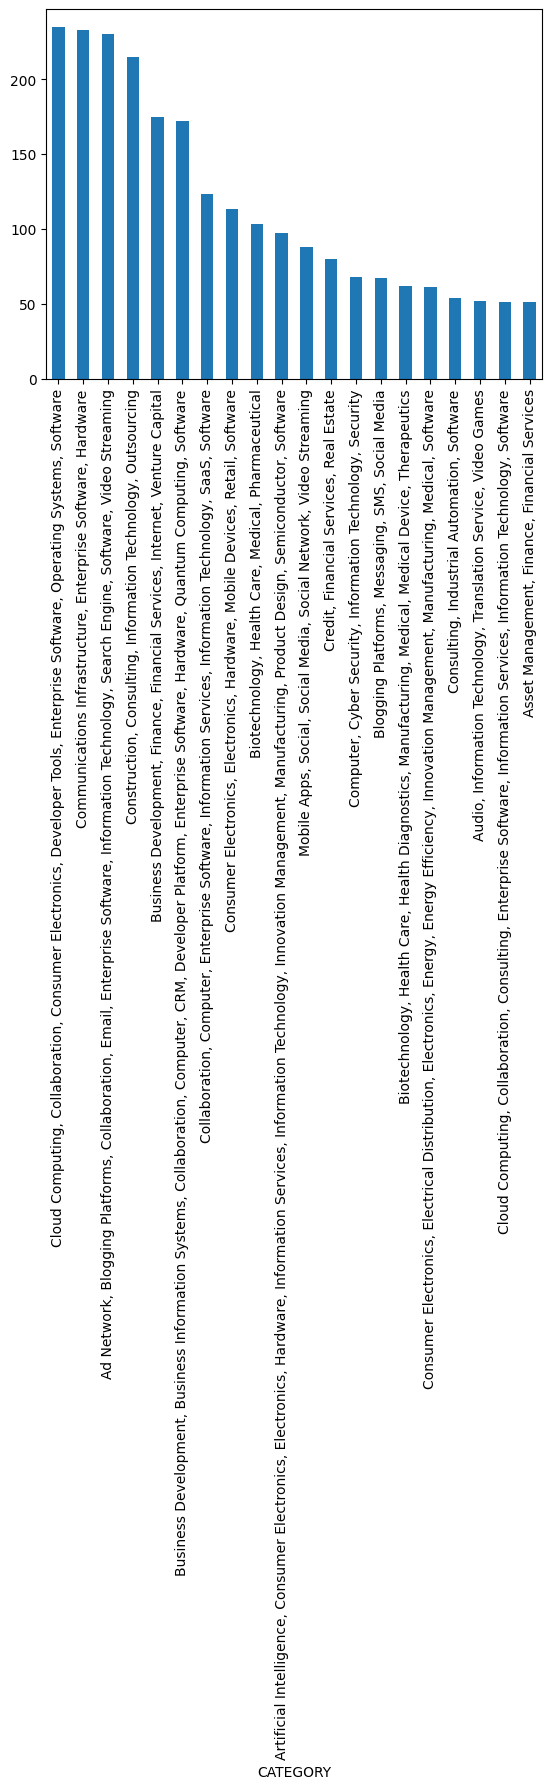

In [40]:
df_acquisition_category["CATEGORY"].value_counts().head(20).plot.bar()

Globally, the most actives firms in acquisition are tech related firms (cloud, software....).
As highligted before, those firms are really centered on buying other firms to accelerate their own growth to have a better innovation probably.
Other really active firms are in finance, health or cybersecurity, but have a lower weight than the tech companies.

In [41]:
# 13. What are the most common job titles? And how does they vary depending on the industry?
jobs = df_employee["JOB_TITLES"].dropna().astype("string").str.split(",")

all_jobs = []

for lst in jobs :
  for job in lst:
    all_jobs.append(job.strip())

pd.Series(all_jobs).value_counts().head(30)

,count
Director,576
Software Engineer,523
Vice President,410
VP,347
Managing Director,294
Product Manager,269
Co-Founder,236
CEO,196
Senior Software Engineer,187
Senior Vice President,173


The most common jobs are in majority link to management (Director, Vice president...) or technicals jobs (like Software engineer or senior software engineer). There is a lot of direction jobs (CEO, CTO, CFO), showing that the dataset is has a lot of huge companies that are already well structured.

In [42]:
df_empl = df_employee.merge(
    df_company[["COMPANY_NAME", "CATEGORY"]],
    on="COMPANY_NAME",
    how="left"
)

In [43]:
jobs = df_empl["JOB_TITLES"].dropna().astype("string").str.split(",")
categories = df_empl["CATEGORY"]

In [44]:
rows = []

for idx in jobs.index :
  job_list = jobs.loc[idx]
  industry = categories.loc[idx]


  for job in job_list:
    rows.append([job.strip(), industry])

In [45]:
df_job_industry = pd.DataFrame(rows, columns=["JOB_TITLE", "CATEGORY"])

In [46]:
df_job_industry.groupby("CATEGORY")["JOB_TITLE"].value_counts().head(30)

CATEGORY                                                                                                                       JOB_TITLE                                         
3D Printing, 3D Technology, Precious Metals, Robotics                                                                          Co-Founder                                             2
                                                                                                                               Chief Designer                                         1
                                                                                                                               Chief Financial Officer                                1
                                                                                                                               Co-Founder & CTO                                       1
                                                                                                                               Co-Founder and CEO                                     1
                                                                                                                               Co-Founder and VP                                      1
                                                                                                                               Co-founder                                             1
                                                                                                                               Software Development                                   1
                                                                                                                               VP of Research & Development                           1
                                                                                                                               Vice President of Business Development                 1
                                                                                                                               Vice President of Engineering                          1
                                                                                                                               Vice President of Global Sales                         1
                                                                                                                               Vice President of Product                              1
3D Technology, Aerospace, Artificial Intelligence, Manufacturing, Space Travel                                                 Co-founder & CEO                                       1
                                                                                                                               Vice President of Avionics and Integrated Software     1
3D Technology, Artificial Intelligence, Augmented Reality, Computer Vision, Machine Learning, Virtual Reality                  3D Face Artist                                         1
                                                                                                                               Co-founder & CEO                                       1
                                                                                                                               Co-founder & CTO                                       1
                                                                                                                               Engineering Lead                                       1
                                                                                                                               Scientist                                              1
3D Technology, Augmented Reality, Media and Entertainment, Mobile Apps, Social Media, Video, Video Streaming, Virtual Reality  Co-Founder     

In [47]:
top_industries = df_job_industry["CATEGORY"].value_counts().head(5)
print("Top 5 industries by employee number :")
print(top_industries)
print()

Top 5 industries by employee number :
CATEGORY
Cloud Computing, Collaboration, Consumer Electronics, Developer Tools, Enterprise Software, Operating Systems, Software                                                                              2129
Ad Network, Blogging Platforms, Collaboration, Email, Enterprise Software, Information Technology, Search Engine, Software, Video Streaming                                                          2014
Artificial Intelligence, Consumer Electronics, Electronics, Hardware, Information Services, Information Technology, Innovation Management, Manufacturing, Product Design, Semiconductor, Software     976
Business Development, Business Information Systems, Collaboration, Computer, CRM, Developer Platform, Enterprise Software, Hardware, Quantum Computing, Software                                      825
Mobile Apps, Social, Social Media, Social Network, Video Streaming                                                                               

In [48]:
for industry in top_industries.index :
  print ("Industry :", industry)
  print(df_job_industry[df_job_industry["CATEGORY"] == industry]["JOB_TITLE"].value_counts().head(5))

Industry : Cloud Computing, Collaboration, Consumer Electronics, Developer Tools, Enterprise Software, Operating Systems, Software
JOB_TITLE
Senior Program Manager       77
Principal Program Manager    66
Program Manager              61
Director                     55
General Manager              44
Name: count, dtype: int64
Industry : Ad Network, Blogging Platforms, Collaboration, Email, Enterprise Software, Information Technology, Search Engine, Software, Video Streaming
JOB_TITLE
Software Engineer           158
Product Manager              97
Director                     51
Developer Advocate           39
Senior Software Engineer     31
Name: count, dtype: int64
Industry : Artificial Intelligence, Consumer Electronics, Electronics, Hardware, Information Services, Information Technology, Innovation Management, Manufacturing, Product Design, Semiconductor, Software
JOB_TITLE
VP                                             114
Director                                        27
Technolog

Here we can notice that the different industries have a variation depending on the industry. But we can notice a pattern, for example tech companies like could or software hava a lot of program managers, whereas companies like AI have a lot of direction jobs like VP or director. To conclude companies that rely on software lile mobile apps have a huge proportion of Sofware engineers or Priduct managers.

The jobs in the industry directly reflect the level of maturity of the industry as well as the nature of the industry.

In [49]:
#14. Which companies employ individuals from the largest variety of educational backgrounds?
schools = df_employee["ATTENDED_SCHOOLS"].dropna().astype("string").str.split(",")
companies = df_employee["COMPANY_NAME"]


In [50]:
rows = []

for idx in schools.index :
  school_list = schools.loc[idx]
  company = companies.loc[idx]

  for school in school_list:
    rows.append([company, school.strip()])

In [51]:
df_company_school = pd.DataFrame(rows, columns=["COMPANY_NAME", "SCHOOL"])

In [52]:
df_company_school.groupby("COMPANY_NAME")["SCHOOL"].nunique().sort_values(ascending=False).head(20)

,SCHOOL
COMPANY_NAME,
Google,348
Microsoft,275
Intel,209
Cisco,166
IBM,159
Facebook,152
SAP,144
Accenture,101
Oracle,92


In [53]:
df_company_school.groupby("COMPANY_NAME")["SCHOOL"].nunique().sort_values(ascending=False).tail(20)

,SCHOOL
COMPANY_NAME,
Wirecard,1
Apprentice.io,1
Arcus,1
Arthur AI,1
Atomwise,1
AutoX,1
Avail,1
Animoca Brands,1
Apartment List,1


In the TOP 20 of the companies that employs employees from the most diverse backgroup almost all of the if not all of them are big multinational with billion of dollars of revenue and often with more employee.

In comparision the 20 companies with the least diverse backgroup are each unkown to the public, and probaly doesn't have a lot of employees.

In [54]:
# 15. Are there noticeable patterns in job titles that could suggest organizational hierarchy or specialization?
jobs = df_employee["JOB_TITLES"].dropna().astype("string").str.split(",")

In [55]:
all_jobs = []

for lst in jobs :
  for job in lst :
    all_jobs.append(job.strip())

In [56]:
jobs_experience = pd.Series(all_jobs)

In [57]:
jobs_experience.value_counts().head(50)

,count
Director,576
Software Engineer,523
Vice President,410
VP,347
Managing Director,294
Product Manager,269
Co-Founder,236
CEO,196
Senior Software Engineer,187
Senior Vice President,173


we can definitely notice a pattern as 4 of the 5 most common jobs positions are direction position with Director, VP or managing director.
We can say that the majority of the companies on the dataset are highly hierarchical

In [58]:
#16. How diverse is the talent pool within the companies? What about the companies with major fundings, do they attract employees from more diverse background in average?
diversity = df_company_school.groupby("COMPANY_NAME")["SCHOOL"].nunique().reset_index(name="school_diversity")

In [59]:
diversity_merge = diversity.merge(investment_agg, on="COMPANY_NAME", how="left")

In [60]:
diversity_merge.sort_values("school_diversity", ascending=False).head()

,COMPANY_NAME,school_diversity,investment_count,investment_total,investment_average
293,Google,348,7,63100000,9014285.714286
424,Microsoft,275,<NA>,<NA>,<NA>
348,Intel,209,2,12510000,6255000.0
142,Cisco,166,3,7500000,2500000.0
324,IBM,159,<NA>,<NA>,<NA>


In [61]:
df_inv = pd.read_excel(excel_path, sheet_name="INVESTMENT")

ms = df_inv[df_inv["COMPANY_NAME"] == "Microsoft"]

ibm = df_inv[df_inv["COMPANY_NAME"] == "IBM"]

print("Microsoft rows:", len(ms))
print(ms)

print("\nIBM rows:", len(ibm))
print(ibm)


Microsoft rows: 0
Empty DataFrame
Columns: [COMPANY_NAME, FUNDING_TYPE, MONEY_RAISED, ANNOUNCED_DATE, INVESTMENT_STAGE, Unnamed: 5, Unnamed: 6, Unnamed: 7, Unnamed: 8, Unnamed: 9, Unnamed: 10]
Index: []

IBM rows: 0
Empty DataFrame
Columns: [COMPANY_NAME, FUNDING_TYPE, MONEY_RAISED, ANNOUNCED_DATE, INVESTMENT_STAGE, Unnamed: 5, Unnamed: 6, Unnamed: 7, Unnamed: 8, Unnamed: 9, Unnamed: 10]
Index: []


Results shows that companies that have the most academic diversity amoung theit emplyees are for some of them like Google, Intel or Cisco those who attract investors as well.
However other bir corporations like Microsoft or IBM also have a relly diverse academix diversity, but doesn't have a investment in the dataset. Maybe because they don't use traditional financing anymore.

In [62]:
#17. Do companies with more employees tend to receive larger investment amounts?
employee_funds = df_company_full[["COMPANY_NAME","EMPLOYEE_NUMBER_CLEAN","investment_total"]].dropna()
employee_funds.head(15)

,COMPANY_NAME,EMPLOYEE_NUMBER_CLEAN,investment_total
0,Orange,10001.0,0
1,OpenLattice,11.0,5300000
3,AngelList,1.0,26100000
4,Desktop Metal,101.0,613000000
5,Relativity Space,251.0,685720000
6,Archistar.ai,51.0,0
7,Loom.ai,11.0,13350000
8,360VUZ,11.0,8443000
9,Parallel Domain,11.0,11000000
10,PTC,5001.0,1000000000


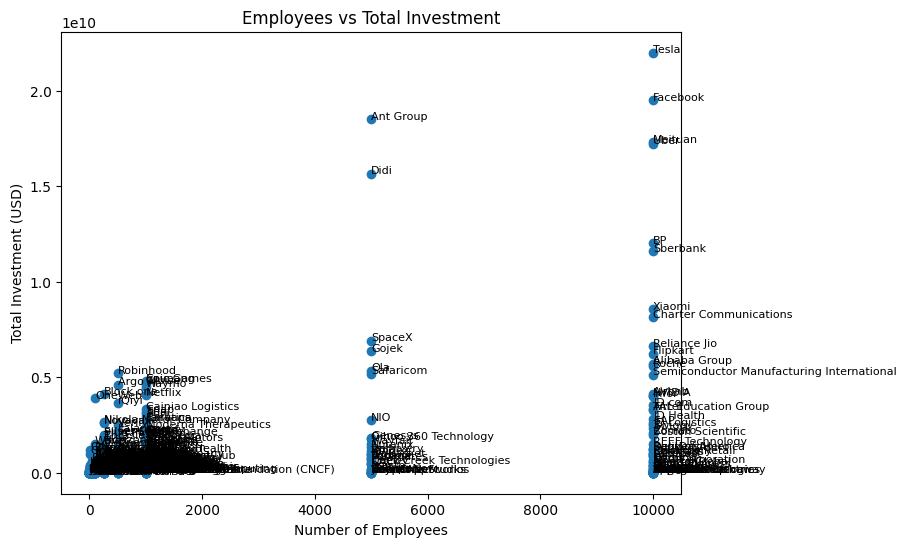

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(employee_funds["EMPLOYEE_NUMBER_CLEAN"], employee_funds["investment_total"])
for i, row in employee_funds.iterrows():
  plt.text(row["EMPLOYEE_NUMBER_CLEAN"],
           row["investment_total"],
           row["COMPANY_NAME"],
           fontsize=8)

plt.xlabel("Number of Employees")
plt.ylabel("Total Investment (USD)")
plt.title("Employees vs Total Investment")
plt.show()

Overall, even if we can notice clusters, the scatter plot shows no string relationship between company size and the total amount of investment received.
This suggest that funding dynamics depend more on industry and business model than on workforce size.

In [64]:
test = df_investment.merge(
    df_acquisition[["COMPANY_NAME"]],
    on="COMPANY_NAME",
    how="left"
)
test.head()

,COMPANY_NAME,FUNDING_TYPE,MONEY_RAISED,ANNOUNCED_DATE,INVESTMENT_STAGE,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,MONEY_RAISED_CLEAN,CURRENCY,AMOUNT_RAW,RATE,MONEY_RAISED_USD,ANNOUNCED_YEAR
0,Pipe,Venture - Series Unknown,"$250,000,000",2021-03-31,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,250000000,USD,250000000,1.0,250000000.0,2021
1,Pipe,Series A,"$50,000,000",2021-03-09,Early Stage Venture,NaN,NaN,NaN,NaN,NaN,<NA>,50000000,USD,50000000,1.0,50000000.0,2021
2,Pipe,Seed,"$6,000,000",2020-02-25,Seed,NaN,NaN,NaN,NaN,NaN,<NA>,6000000,USD,6000000,1.0,6000000.0,2020
3,Pipe,Seed,"$10,000,000",2020-06-24,Seed,NaN,NaN,NaN,NaN,NaN,<NA>,10000000,USD,10000000,1.0,10000000.0,2020
4,Epic Games,Seed,"$1,000,000,000",2021-04-13,Seed,NaN,NaN,NaN,NaN,NaN,<NA>,1000000000,USD,1000000000,1.0,1000000000.0,2021


In [65]:
#18. Is there a link between investment stage and acquisition strategy?
investment_acq = df_investment.merge(
    df_acquisition[["COMPANY_NAME"]],
    how="left",
    indicator=True
)

investment_acq["HAS_ACQ"] = investment_acq["_merge"]=="both"
investment_acq.groupby("INVESTMENT_STAGE")["HAS_ACQ"].sum()

,HAS_ACQ
INVESTMENT_STAGE,
Early Stage Venture,4858
Late Stage Venture,5663
Private Equity,1599
Seed,2761


Results shows that companys that realised acquisition are often in Late Stage Venture or Early Stage Venture.
This tends to show that more mature companies that are well financed already are more likely to acquire other companies.


In [66]:
#19? Do companies founded earlier have higher chances of having exited, closed or acquired compared to more recent firms?
df_company_full["FOUNDED_YEAR"] = df_company_full["FOUNDED_ON"].dt.year
df_company_full.groupby("STATUS")["FOUNDED_YEAR"].mean()

,FOUNDED_YEAR
STATUS,
Active,2010.469767
Closed,2011.000000
Exited,1990.515385


In [70]:
df_company_full["FOUNDED_CATEGORY"] = "after_2010"
df_company_full.loc[df_company_full["FOUNDED_YEAR"]<2000, "FOUNDED_CATEGORY"] = "before_2000"
df_company_full.loc[(df_company_full["FOUNDED_YEAR"]>=2000)& (df_company_full["FOUNDED_YEAR"] <= 2010), "FOUNDED_CATEGORY"] = "2000_2010"

df_company_full.groupby(["FOUNDED_CATEGORY", "STATUS"])["COMPANY_NAME"].count()

FOUNDED_CATEGORY  STATUS
2000_2010         Active     40
                  Closed      1
                  Exited     57
after_2010        Active    630
                  Closed      1
                  Exited    214
before_2000       Active      7
                  Exited     50
Name: COMPANY_NAME, dtype: int64

In [72]:
data = {
    "FOUNDED_CATEGORY": ["2000_2010","2000_2010","2000_2010",
                         "after_2010","after_2010","after_2010",
                         "before_2000","before_2000"],
    "STATUS": ["Active","Closed","Exited",
               "Active","Closed","Exited",
               "Active","Exited"],
    "COUNT": [40,1,57,
              630,1,214,
              7,50]
}

df_group = pd.DataFrame(data)


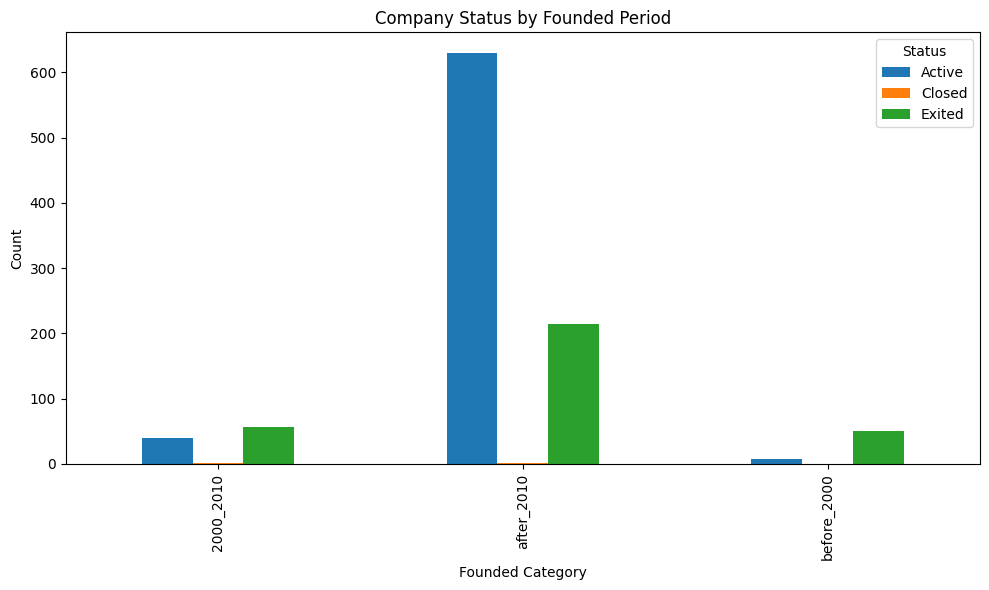

In [74]:
plot_df = df_group.pivot(index="FOUNDED_CATEGORY", columns="STATUS", values="COUNT")
plot_df = plot_df.fillna(0)

plot_df.plot(kind="bar", figsize=(10,6))

plt.title("Company Status by Founded Period")
plt.xlabel("Founded Category")
plt.ylabel("Count")
plt.legend(title="Status")
plt.tight_layout()
plt.show()

The results show a clear tendency, companies founded before 200 are more likely to exit the market (50 already did), et only a few are still active to this day.
For the companies created after 2000, they have a more balced profile, with still more than half the companies that exited (57).
As for the companies created after 2010, are the one that are the most likely to be active as more than 600 are still active for only 200 exit. Which is quite logical as they are probably too recent to be closed or acquired.
So we can say that the oldest the company is the more likely she is to have closed or exited the market, whereas new companies are for the most of them still active.

In [76]:
#20. How do employees diversity and company sucess correlate? Do firm with more variety have higher investment or acquisition?
diversity_full = diversity.merge(investment_agg, on="COMPANY_NAME", how="left").merge(acquisition_agg,on="COMPANY_NAME", how="left")
diversity_full.sort_values("school_diversity", ascending=False).head(20)

,COMPANY_NAME,school_diversity,investment_count,investment_total,investment_average,acquisition_count,acquisition_total,acquisition_average
293,Google,348,7,63100000,9014285.714286,230.0,26663300000,634840476.190476
424,Microsoft,275,<NA>,<NA>,<NA>,235.0,77567000000,2350515151.515152
348,Intel,209,2,12510000,6255000.0,97.0,63571000000,1816314285.714286
142,Cisco,166,3,7500000,2500000.0,233.0,77345499998,564565693.416058
324,IBM,159,<NA>,<NA>,<NA>,172.0,51706000000,2462190476.190476
242,Facebook,152,15,19509617488,1300641165.866667,88.0,24298970000,1278893157.894737
570,SAP,144,2,2600000000,1300000000.0,51.0,31235000000,2402692307.692307
6,Accenture,101,2,12000000,6000000.0,215.0,695000000,173750000.0
483,Oracle,92,0,0,<NA>,123.0,42031000000,1910500000.0
350,Investcorp,86,<NA>,<NA>,<NA>,51.0,490000000,245000000.0


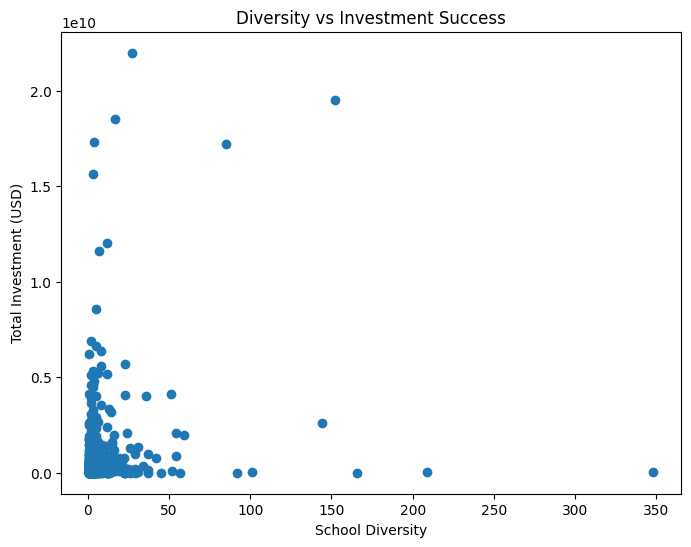

In [77]:
df_plot_div = diversity_full.dropna(subset=["investment_total"])

plt.figure(figsize= (8,6))
plt.scatter(df_plot_div["school_diversity"], df_plot_div["investment_total"])

plt.xlabel("School Diversity")
plt.ylabel("Total Investment (USD)")
plt.title("Diversity vs Investment Success")
plt.show()

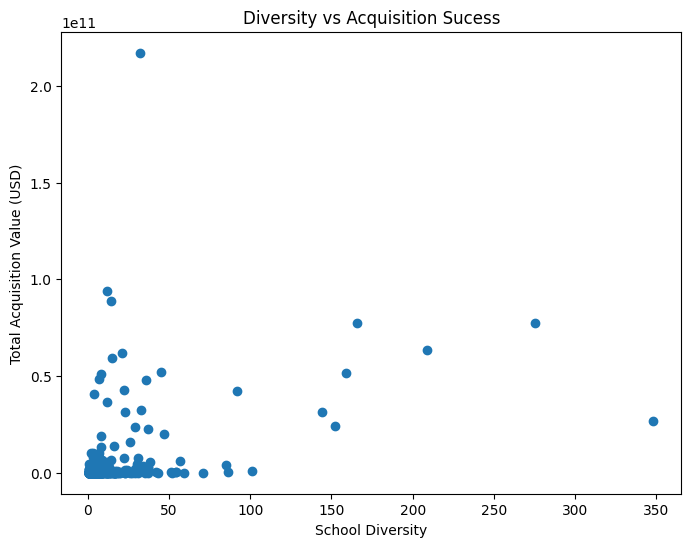

In [78]:
df_plot_div2 = diversity_full.dropna(subset=["acquisition_total"])

plt.figure(figsize=(8,6))
plt.scatter(df_plot_div2["school_diversity"], df_plot_div2["acquisition_total"])

plt.xlabel("School Diversity")
plt.ylabel("Total Acquisition Value (USD)")
plt.title("Diversity vs Acquisition Sucess")
plt.show()

Results really show a clear correlation between diversity in educaiton et the sucess of the companies.
Firms with the widest school variety amount their employees (Google, Microsoft, Intel) are also often the one with the highest amount of acquisition, and also investments.
On the contrary companies with less diversity have usually a a lowest investlment level and same for acquisitions.
Globally we can state that the companies with the strongest educational diversity are also the most powerful financially.
However, it is most likely that their sucess give them the attractiveness to attract a lot a talents from diverse backgrounds, more than diversity being the cause of their success.